---
title: Time resolution effect
abstract: To understand if the difference of Juno distribution at 1AU and beyond is due to time resolution, i.e. it's possile that 1s is sufficient to resolve distribution at r>1.5AU, but insufficient at 1AU. To check this we may compare ARTEMIS data at 1AU for two resolutions - 1s and 1/5s
---

In [67]:
from ids_finder.utils.basic import load_params
from ids_finder.utils.basic import load_catalog

import polars as pl

from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects



In [68]:
#| hide
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

r = robjects.r
r.source('utils.R')

conv_pl = py2rpy_polars()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [69]:
params = load_params()
catalog = load_catalog()

In [70]:
params['experiments'][1]['datasets'][0]


{
    'name': 'wind_ts_high',
    'start': '2012-01-01',
    'end': '2012-12-31',
    'tau': 60,
    'Wind': {'MAG': {'datatype': 'h4-rtn', 'coords': 'rtn', 'bcols': ['BRTN_0', 'BRTN_1', 'BRTN_2']}},
    'output_path': 'data/04_feature/Wind_ts_high'
}

In [75]:
wind_ts_low_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_1s_tau_60s')
wind_ts_high_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.09s_tau_60s')
wind_ts_01_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.1s_tau_60s')
wind_ts_02_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.2s_tau_60s')
wind_ts_05_all: pl.LazyFrame = catalog.load('events.l1.Wind_ts_0.5s_tau_60s')
juno_ts_low_all: pl.LazyFrame = catalog.load('events.l1.JNO_ts_1s_tau_60s')

time_filter = pl.col('time').dt.year()==2016

wind_ts_low = wind_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('1s'),
    sat = pl.lit('Wind')
)
wind_ts_high = wind_ts_high_all.filter(time_filter).with_columns(
    ts = pl.lit('0.09s'),
    sat = pl.lit('Wind')
)

wind_ts_01 = wind_ts_01_all.filter(time_filter).with_columns(
    ts = pl.lit('0.1s'),
    sat = pl.lit('Wind')
)
wind_ts_02 = wind_ts_02_all.filter(time_filter).with_columns(
    ts = pl.lit('0.2s'),
    sat = pl.lit('Wind')
)
wind_ts_05 = wind_ts_05_all.filter(time_filter).with_columns(
    ts = pl.lit('0.5s'),
    sat = pl.lit('Wind')
)

juno_ts_low = juno_ts_low_all.filter(time_filter).with_columns(
    ts = pl.lit('Juno 1s'),
    sat = pl.lit('JUNO')
)

df = pl.concat([juno_ts_low, wind_ts_high, wind_ts_01, wind_ts_02, wind_ts_05, wind_ts_low], how='diagonal').collect()

%R -i df -c conv_pl


[01/03/24 21:50:36] INFO     Loading data from 'events.l1.Wind_ts_1s_tau_60s'                   ]8;id=310846;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=508789;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.09s_tau_60s'                ]8;id=390241;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=176452;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.1s_tau_60s'                 ]8;id=572315;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=545525;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.2s_tau_60s'                 ]8;id=94335;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=591536;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.Wind_ts_0.5s_tau_60s'                 ]8;id=191738;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=694595;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

                    INFO     Loading data from 'events.l1.JNO_ts_1s_tau_60s'                    ]8;id=713354;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=113081;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (LazyPolarsDataset)...                                                                

In [76]:
df.group_by('ts', 'sat').agg(pl.count())

ts,sat,count
str,str,u32
"""0.5s""","""Wind""",8664
"""Juno 1s""","""JUNO""",1223
"""0.2s""","""Wind""",8698
"""0.1s""","""Wind""",8731
"""1s""","""Wind""",8711


[01/03/24 21:55:43] WARNING  R[write to console]: In addition:                                     ]8;id=119954;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=529075;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\

                    WARNING  R[write to console]: Warning messages:                                ]8;id=963290;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=569547;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                                                                                                                   

                    WARNING  R[write to console]: 1: Removed 334 rows containing non-finite values ]8;id=446172;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=996153;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             (`stat_density()`).                                                                   
                                                                                                                   

                    WARNING  R[write to console]: 2: Removed 502 rows containing non-finite values ]8;id=33921;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py\callbacks.py]8;;\:]8;id=164652;file:///Users/zijin/miniforge3/envs/cool_planet/lib/python3.10/site-packages/rpy2/rinterface_lib/callbacks.py#124\124]8;;\
                             (`stat_density()`).                                                                   
                                                                                                                   

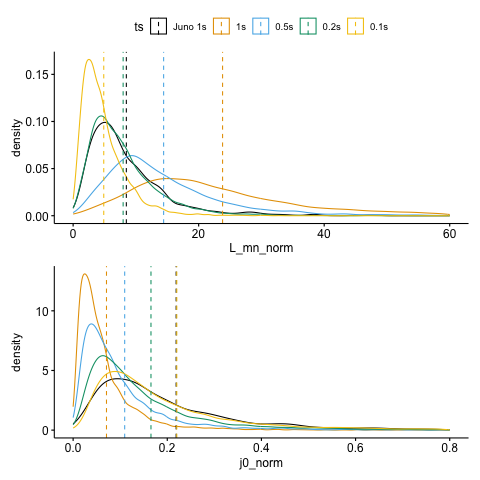

In [82]:
%%R
# sort color with 'JUNO 1s' first
temp_df <- df %>%
  mutate(ts = factor(ts, levels = c("Juno 1s", "1s", "0.5s", "0.2s", "0.1s")))

color <- "ts"
add <- "mean"
common_custom <- scale_color_okabeito(palette = "black_first")

x <- "L_mn"
x_lim <- c(0,7500)
p1 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "L_mn_norm"
x_lim <- c(0,60)
p2 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "j0"
x_lim <- c(0,20)
p3 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

x <- "j0_norm"
x_lim <- c(0,0.8)
p4 <- ggdensity(temp_df, x = x, color = color, add = add, alpha = 0) + xlim(x_lim) + common_custom

# p1 + p2 + p3 + p4  +
p2 + p4  +
  plot_layout(guides = 'collect', nrow=2) &
  theme(legend.position='top')